In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

C:\Users\Vincelot\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. Sentence Embedding and UMAP

In [16]:
reddit_data = pd.read_csv("Data\submission_and_comments_V3.csv",sep = ";")
submission_title = reddit_data['submission_title'].tolist()
submission_title = [post for post in submission_title if ((post != "[deleted by user]") and (type(post) == str) and (str(type) != 'nan'))]


In [36]:
model = SentenceTransformer('all-MiniLM-L6-v2')
model.max_seq_length = 200
#emb_title = model.encode(submission_title, show_progress_bar = True, normalize_embeddings = True)
emb_title = model.encode(submission_title, show_progress_bar = True, normalize_embeddings = False)

Batches: 100%|██████████| 642/642 [01:45<00:00,  6.08it/s]


In [39]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler

reducer = umap.UMAP(metric = "cosine", verbose = True, n_neighbors = 200, min_dist = 0)
embedding = reducer.fit_transform(emb_title)
embedding

UMAP(angular_rp_forest=True, metric='cosine', min_dist=0, n_neighbors=200, verbose=True)
Thu Apr 27 23:16:47 2023 Construct fuzzy simplicial set
Thu Apr 27 23:16:47 2023 Finding Nearest Neighbors
Thu Apr 27 23:16:47 2023 Building RP forest with 12 trees
Thu Apr 27 23:16:47 2023 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	 4  /  14
	 5  /  14
	Stopping threshold met -- exiting after 5 iterations
Thu Apr 27 23:17:24 2023 Finished Nearest Neighbor Search
Thu Apr 27 23:17:27 2023 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:19]

Thu Apr 27 23:17:51 2023 Finished embedding


array([[5.1803007 , 7.781455  ],
       [3.1551023 , 1.236462  ],
       [9.787257  , 0.02467975],
       ...,
       [9.805037  , 0.12287506],
       [6.0817137 , 0.11420345],
       [3.6847756 , 5.0476646 ]], dtype=float32)

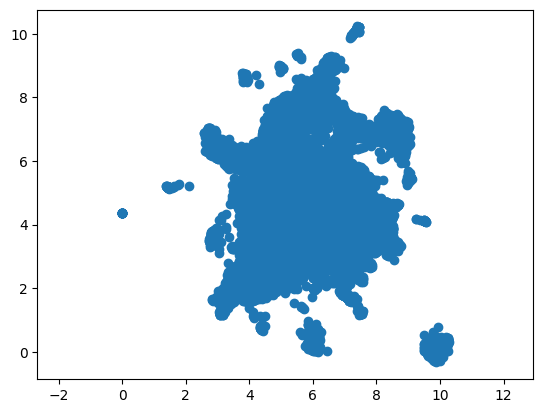

In [40]:
plt.scatter(embedding[:, 0],embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')

# 2. GloVE Embedding

In [ ]:
import itertools
submission_title = [post for post in submission_title if type(post)== str]
all_titles = " ".join(submission_title)
all_titles

In [47]:
from collections.abc import Sequence
from redditscore.tokenizer import CrazyTokenizer
tokenizer = CrazyTokenizer()

#Next Steps : Find a good tokenizer
#Plot PCA, t-SNE, UMAP


#HDBSCAN
# Topic modelling with clustering

# Topic clustering with matrix factorization

# Clustering in high dimension
  ## k-means with anomaly
  ## k-means in high dimension
  ## hdbscan in high dimension

# Production
 ## [?] Fine-tune a language model on my dataset -> Produce answers, help people or answer to every post | RL?s
 ## Predict trends
 ## Anomaly detection
 ## Sentiment analysis

ImportError: cannot import name 'Sequence' from 'collections' (C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\lib\collections\__init__.py)

In [42]:
from gensim.models import Word2Vec, FastText
word2vec_model = Word2Vec(submission_title, min_count=1, vector_size = 100)

emb_list = []
for sentence in submission_title:
    emb_word_sentence = []
    for word in sentence:
        word_emb = word2vec_model.wv[word]
        emb_word_sentence.append(list(word_emb))
    emb_list.append(np.mean(emb_word_sentence, axis = 0))


array([ 0.0245623 , -0.56628025, -0.25084868, -0.22790334, -0.1313172 ,
        0.22447142, -0.09554422, -0.41194585,  0.63076746,  0.32235458,
       -0.23879668,  0.30890086,  0.08503497,  0.04275969, -0.4800312 ,
        0.03688867, -0.30112827, -0.02687717,  0.3941234 ,  0.82261884,
       -0.09961825, -0.09007079, -0.64523923,  0.2648731 ,  0.23848684,
       -0.07304727,  0.12140784, -0.21319416, -0.13922197, -0.15971449,
       -0.01969812,  0.46774495,  0.13554434,  0.18084398, -0.02079982,
        0.04825205, -0.26194566, -0.23379533,  0.21908729, -0.0358034 ,
       -0.30973497, -0.15652436,  0.45420092, -0.24296318,  0.12402495,
       -0.03253535,  0.37008613, -0.30359873, -0.03927477, -0.37225243,
        0.09775558,  0.293529  , -0.20850295, -0.18037051,  0.35588437,
        0.12035795, -0.27915996,  0.06995369, -0.03464903, -0.22346415,
        0.28802103,  0.11009479, -0.3099743 ,  0.01504794, -0.16120182,
        0.08537602, -0.20390645, -0.14000039, -0.13601722,  0.20